<a href="https://colab.research.google.com/github/kaveesha06/fyp_short_sem/blob/master/merged__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
root_path = 'drive/My Drive/FYP/dataset/'

dataFrameA = pd.read_csv(root_path +'gse63060_61.merged.exp',sep = "\t", index_col=0)
#print (data.iloc[100:])
print(dataFrameA.head())


              GSM1539080  GSM1539081  ...  GSM1539795  GSM1539796
Probesets                             ...                        
ILMN_1343291   13.761380   13.527839  ...   13.865989   14.024841
ILMN_1343295   10.917023   10.903870  ...   10.901457   10.485913
ILMN_1651209    6.724694    6.750624  ...    6.886932    6.722818
ILMN_1651221    6.676588    6.662286  ...    6.747088    6.660136
ILMN_1651228   11.119312   10.375239  ...   10.030235   11.383058

[5 rows x 717 columns]


In [5]:
root_path = 'drive/My Drive/FYP/dataset/probes/'
dataFrameB = pd.read_csv(root_path + 'illumina2.csv', index_col=0, encoding = 'unicode_escape')

print(dataFrameB.head())


                   Species  ILMN_Gene  ...     Symbol   Cytoband
PROBE_ID                               ...                      
ILMN_1725881  Homo sapiens   LOC23117  ...   LOC23117   16p12.2a
ILMN_1910180  Homo sapiens  HS.575038  ...        NaN        NaN
ILMN_1804174  Homo sapiens     FCGR2B  ...     FCGR2B    1q23.3b
ILMN_1796063  Homo sapiens     TRIM44  ...     TRIM44     11p13a
ILMN_1811966  Homo sapiens  LOC653895  ...  LOC653895  10q11.23b

[5 rows x 7 columns]


In [0]:
results = dataFrameA.merge(dataFrameB, left_on = dataFrameA.index, right_on = dataFrameB.index)


In [7]:
print(results.Entrez_Gene_ID.isna().sum())  # 2793 Enttrez_Gene_ID null values 
results = results.dropna(axis=0, subset=['Entrez_Gene_ID'])
print(results.Entrez_Gene_ID.unique().size) #number of unique genes = 16928

print(results.head())

2793
16928
          key_0  GSM1539080  GSM1539081  ...    Accession     Symbol   Cytoband
0  ILMN_1343291   13.761380   13.527839  ...  NM_001402.5     EEF1A1      6q13c
1  ILMN_1343295   10.917023   10.903870  ...  NM_002046.3      GAPDH  12p13.31d
2  ILMN_1651209    6.724694    6.750624  ...  NM_182838.1    SLC35E2   1p36.33a
3  ILMN_1651221    6.676588    6.662286  ...  XM_926225.1  LOC642820        NaN
4  ILMN_1651228   11.119312   10.375239  ...  NM_001031.4      RPS28   19p13.2d

[5 rows x 725 columns]


In [8]:
results.set_index('key_0', inplace=True) #setting the index to probe ids
print(results.head())

              GSM1539080  GSM1539081  ...     Symbol   Cytoband
key_0                                 ...                      
ILMN_1343291   13.761380   13.527839  ...     EEF1A1      6q13c
ILMN_1343295   10.917023   10.903870  ...      GAPDH  12p13.31d
ILMN_1651209    6.724694    6.750624  ...    SLC35E2   1p36.33a
ILMN_1651221    6.676588    6.662286  ...  LOC642820        NaN
ILMN_1651228   11.119312   10.375239  ...      RPS28   19p13.2d

[5 rows x 724 columns]


Visualisation

In [9]:
#results.drop(columns =['Symbol','Cytoband', 'Accession','GI','Species','ILMN_Gene','Entrez_Gene_ID'], axis = 1,inplace=True)
#results.set_index('PROBE_ID',inplace=True)
results_transpose = results.T
#results_transpose.columns = results_transpose.columns.droplevel(0)


Index(['GSM1539080', 'GSM1539081', 'GSM1539082', 'GSM1539083', 'GSM1539084',
       'GSM1539085', 'GSM1539086', 'GSM1539087', 'GSM1539088', 'GSM1539089',
       ...
       'GSM1539794', 'GSM1539795', 'GSM1539796', 'Species', 'ILMN_Gene',
       'Entrez_Gene_ID', 'GI', 'Accession', 'Symbol', 'Cytoband'],
      dtype='object', length=724)


In [0]:
root_path = 'drive/My Drive/FYP/dataset/probes/'
dataFrameC = pd.read_csv(root_path + 'info.csv', index_col=0, encoding = 'unicode_escape')


In [22]:
# delete all rows for which column 'status' has a value other than MCI, AD and CTL
indexNames = dataFrameC[ (dataFrameC.status == 'borderline MCI') | (dataFrameC.status == 'OTHER') | (dataFrameC.status == 'CTL to AD') | (dataFrameC.status == 'MCI to CTL')].index
dataFrameC.drop(indexNames , inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
#Assigning numeric values to catogrical values
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
dataFrameC.iloc[:,0] = labelEncoder_X.fit_transform(dataFrameC.iloc[:,0])


Index(['GSM1539080', 'GSM1539081', 'GSM1539082', 'GSM1539083', 'GSM1539084',
       'GSM1539085', 'GSM1539086', 'GSM1539087', 'GSM1539088', 'GSM1539089',
       ...
       'GSM1539787', 'GSM1539788', 'GSM1539789', 'GSM1539790', 'GSM1539791',
       'GSM1539792', 'GSM1539793', 'GSM1539794', 'GSM1539795', 'GSM1539796'],
      dtype='object', name='GSMID', length=711)


In [21]:
finalResults = dataFrameC.merge(results.T, left_on = dataFrameC.index, right_on = results.T.index)
print(finalResults.head())

        key_0  status ILMN_1343291  ... ILMN_2415926 ILMN_2415949 ILMN_2415979
0  GSM1539080       2      13.7614  ...      6.96311      7.23948      9.53405
1  GSM1539081       2      13.5278  ...      7.05117      7.23875       9.8721
2  GSM1539082       2      13.7775  ...      7.05838      7.26987      10.3233
3  GSM1539083       2      13.5468  ...      7.25816      7.28537      9.69662
4  GSM1539084       2      13.1484  ...      7.02776      7.19605      9.95535

[5 rows x 22758 columns]


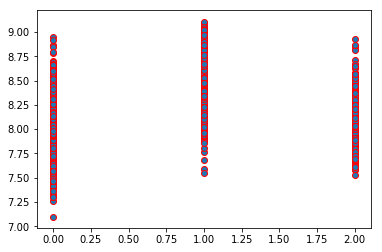

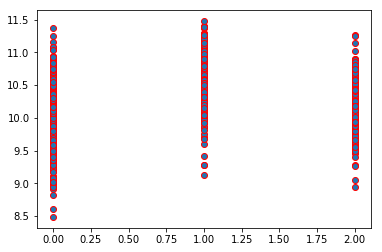

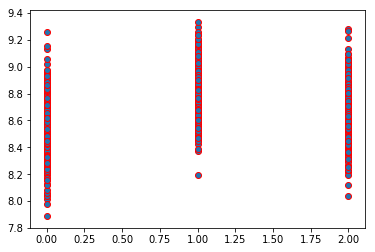

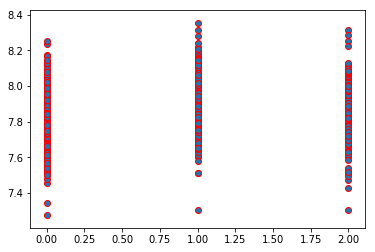

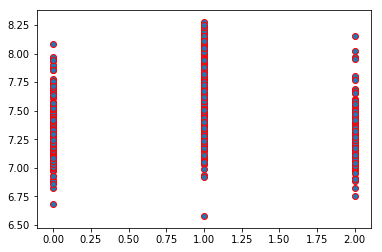

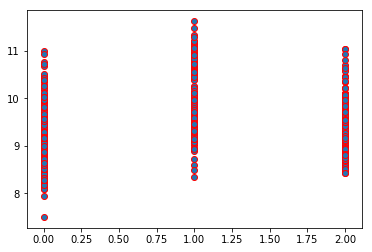

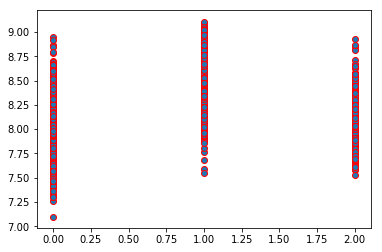

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
listA = ['ILMN_2097421','ILMN_2189933','ILMN_1695645','ILMN_1703617','ILMN_2237746','ILMN_1784286','ILMN_2097421']
for i in range(len(listA)):
  plt.figure(i)
  plt.scatter(finalResults['status'], finalResults.loc[:, listA[i]], edgecolors='r')